C:\Users\sharp\AppData\Local\Temp\ipykernel_11872\1753719692.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/lon_data.csv")


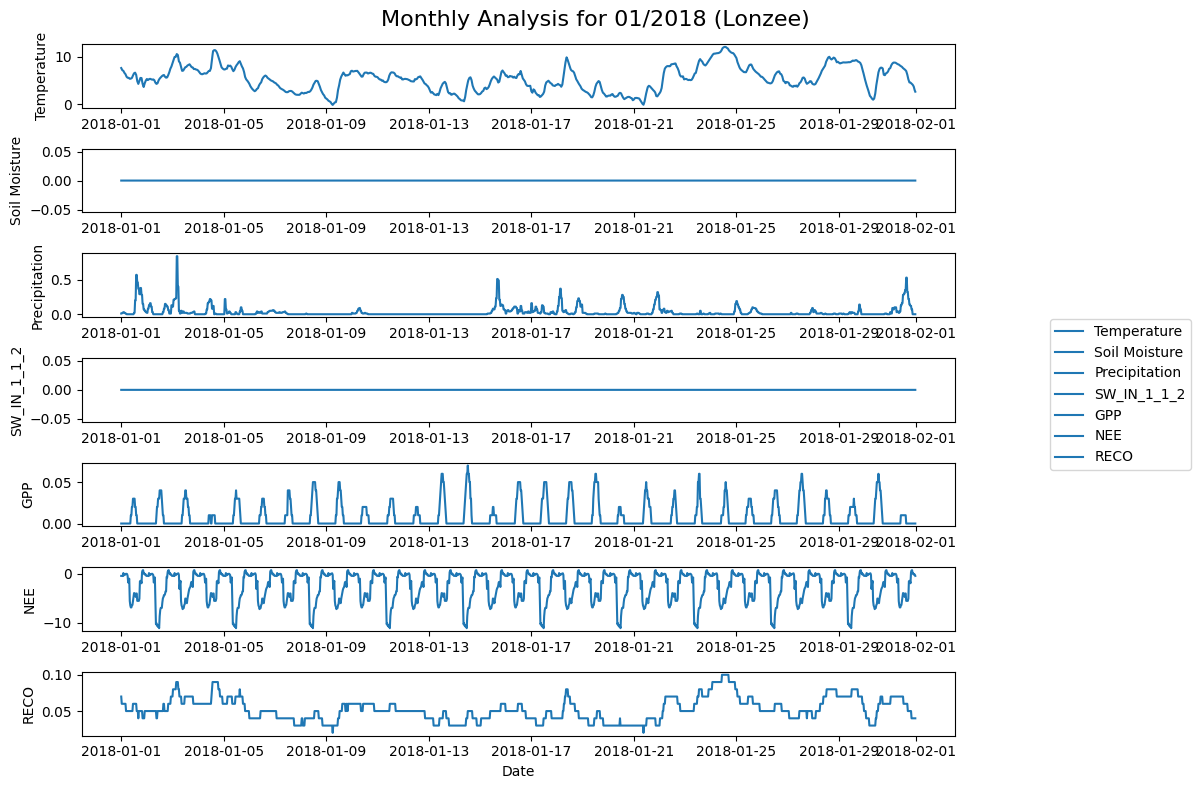

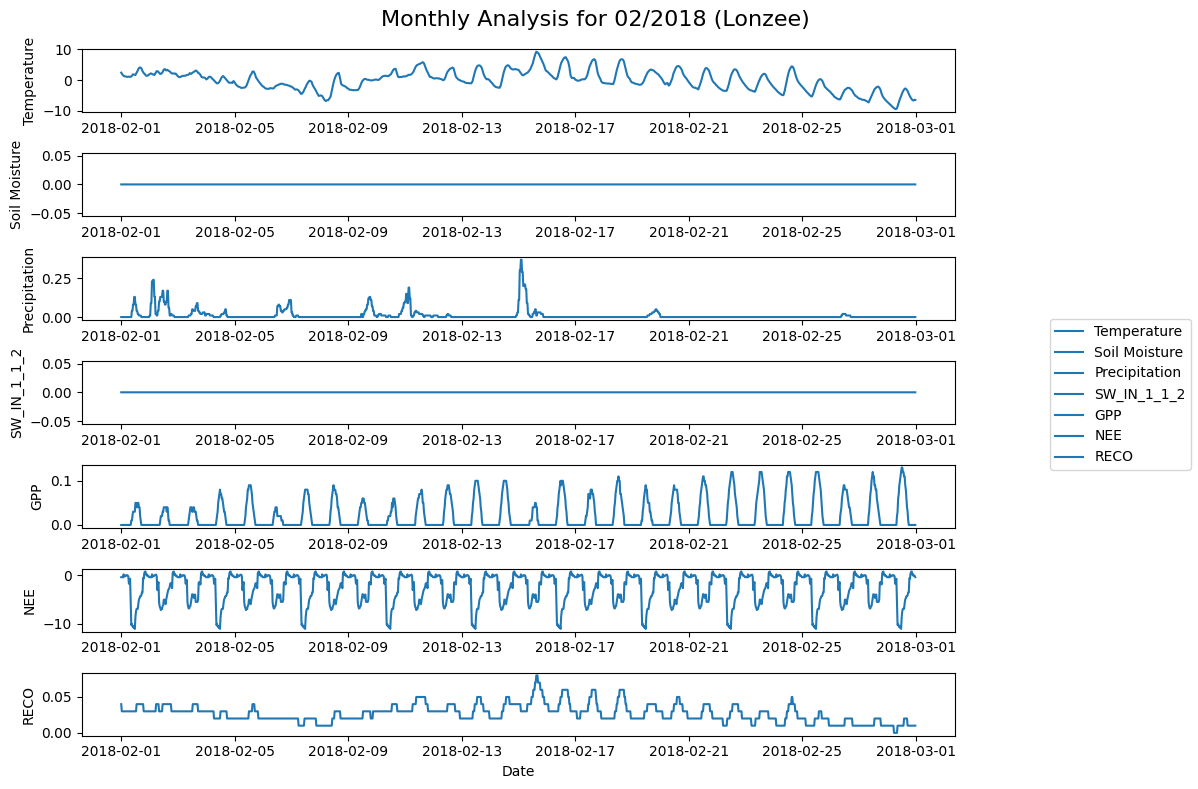

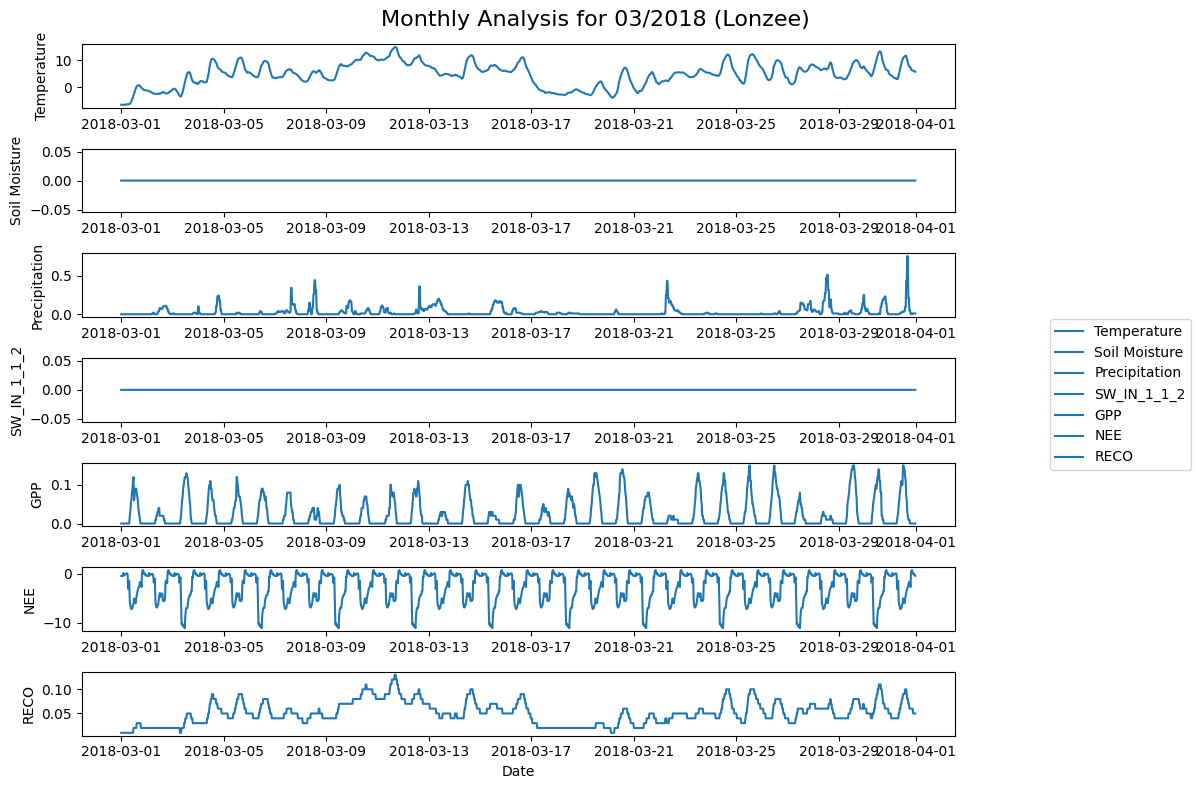

KeyboardInterrupt: 

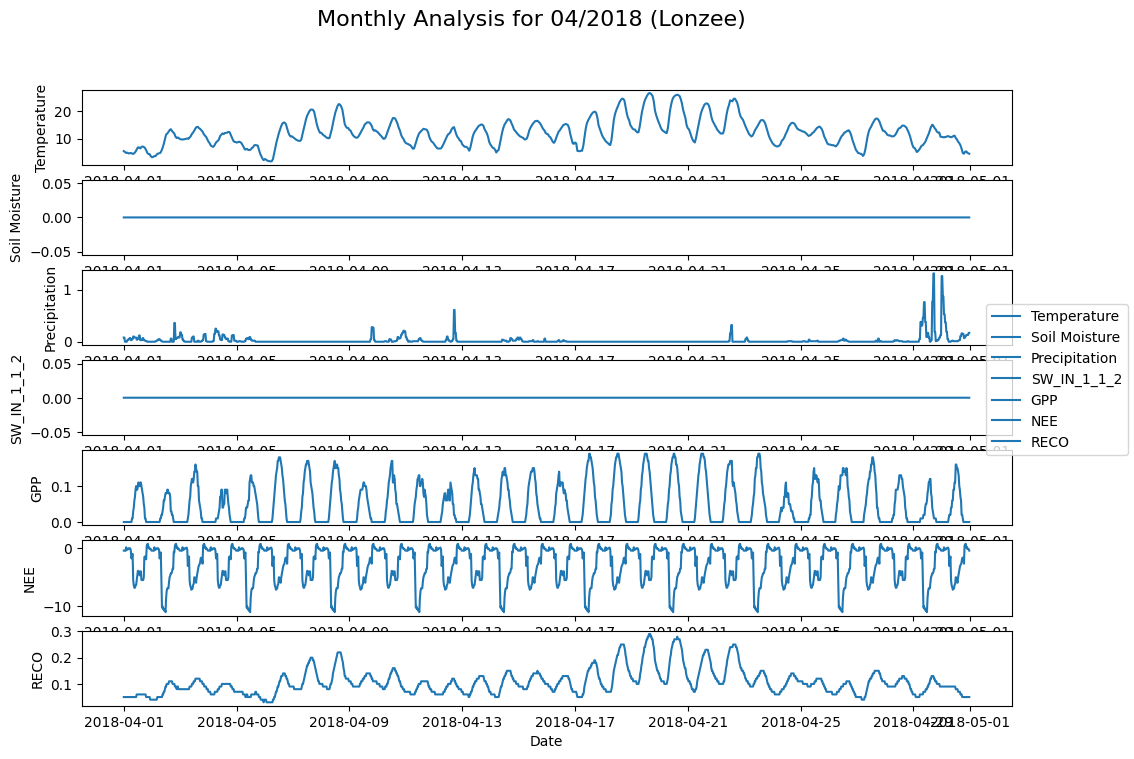

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace "lon_data.xlsx" with the name of your Excel file
df = pd.read_csv("data/lon_data.csv")

# Convert the TIMESTAMP_START column to a datetime format
df["TIMESTAMP_START"] = pd.to_datetime(df["TIMESTAMP_START"], format="%Y%m%d%H%M")

# Extract year and month from the TIMESTAMP_START column
df["Year"] = df["TIMESTAMP_START"].dt.year
df["Month"] = df["TIMESTAMP_START"].dt.month

# List of variables to plot
variables = ["GPP_DT_VUT_REF", "NEE_VUT_REF", "RECO_DT_VUT_REF", "SW_IN_1_1_2"]
variable_labels = ["GPP", "NEE", "RECO", "SW_IN"]

# Loop through each year and month
for year in df["Year"].unique():
    for month in df["Month"].unique():
        # Filter data for the specific year and month
        df_month = df[(df["Year"] == year) & (df["Month"] == month)]

        # Replace -9999 values with 0 for SW_IN_1_1_2 and Soil Moisture
        df_month.loc[df_month["SW_IN_1_1_2"] == -9999, "SW_IN_1_1_2"] = 0
        df_month.loc[df_month["SWC_F_MDS_1"] == -9999, "SWC_F_MDS_1"] = 0

        # Create a figure for GPP, NEE, Reco, Temperature, Soil Moisture, Precipitation, and SW_IN_1_1_1
        fig, axs = plt.subplots(len(variables) + 3, 1, figsize=(12, 8))

        plt.suptitle(f"Monthly Analysis for {month:02d}/{year} (Lonzee)", fontsize=16)

        # Plot Temperature
        axs[0].plot(df_month["TIMESTAMP_START"], df_month["TA_F"], label="Temperature")
        axs[0].set_ylabel("Temperature")

        # Plot Soil Moisture
        axs[1].plot(df_month["TIMESTAMP_START"], df_month["SWC_F_MDS_1"], label="Soil Moisture")
        axs[1].set_ylabel("Soil Moisture")

        # Plot Precipitation
        axs[2].plot(df_month["TIMESTAMP_START"], df_month["P_F"], label="Precipitation")
        axs[2].set_ylabel("Precipitation")

        # Plot SW_IN_1_1_1
        axs[3].plot(df_month["TIMESTAMP_START"], df_month["SW_IN_1_1_2"], label="SW_IN_1_1_2")
        axs[3].set_ylabel("SW_IN_1_1_2")

        for i, variable in enumerate(variables[0:3]):  # Exclude SW_IN_1_1_1 from the loop
            # Plot Variables GPP, NEE, RECO
            axs[i + 4].plot(df_month["TIMESTAMP_START"], df_month[variable], label=variable_labels[i])
            axs[i + 4].set_ylabel(variable_labels[i])

        # Mark events for 2020
        events_2020 = [
                    ("Fertilizer", "202003270000", "black"),
                    ("Fertilizer", "202003300000", "black"),
                    ("Sowing", "202004010000", "cyan"),
                    ("Pesticide", "202004160000", "red"),
                    ("Pesticide", "202005030000", "red"),
                    ("Pesticide", "202005040000", "red"),
                    ("Pesticide", "202005160000", "red"),
                    ("Fertilizer", "202005162330", "black"),
                    ("Pesticide", "202008180000", "red"),
                    ("Harvest", "202011120000", "gold"),
                    ("Tilling", "202011140000", "purple")
                ]

        # Mark events for 2019
        events_2019 = [
                    ("Fertilizer", "201903250000", "black"),
                    ("Fertilizer", "201904170000", "black"),
                    ("Pesticide", "201904172330", "red"),
                    ("Pesticide", "201905100000", "red"),
                    ("Fertilizer", "201905200000", "black"),
                    ("Pesticide", "201906030000", "red"),
                    ("Harvest", "201908010000", "gold"),
                    ("Fertilizer", "201908070000", "black"),
                    ("Tilling", "201908072330", "purple"),
                    ("Sowing", "201908090000", "cyan"),
                    ("Crushing", "201912030000", "grey"),
                    ("Tilling", "201908040000", "purple")
                ]
                
        # Mark events for 2021
        events_2021 = [
                    ("Fertilizer", "202103030000", "black"),
                    ("Fertilizer", "202103310000", "black"),
                    ("Sowing", "202103310000", "cyan"),
                    ("Pesticide", "202104030000", "red"),
                    ("Crushing", "202106080000", "grey"),
                    ("Fertilizer", "202106100000", "black"),
                    ("Tilling", "202106140000", "purple"),
                    ("Pesticide", "202107220000", "red"),
                    ("Sowing", "202107222330", "cyan"),
                    ("Pesticide", "202107240000", "red"),
                    ("Pesticide", "202108140000", "red"),
                    ("Pesticide", "202109070000", "red"),
                    ("Fertilizer", "202109072330", "black"),
                    ("Pesticide", "20210920000", "red"),
                    ("Fertilizer", "202109202330", "black"),
                    ("Irrigation", "202109250000", "blue"),
                    ("Harvest", "202110240000", "gold"),
                    ("Tilling", "202110270000", "purple"),
                    ("Sowing", "202110280000", "cyan")
                ]
                
        # Mark events for 2022
        events_2022 = [
                    ("Fertilizer", "202203240000", "black"),
                    ("Pesticide", "202204130000", "red"),
                    ("Fertilizer", "202204132330", "black"),
                    ("Fertilizer", "202204142330", "black"),
                    ("Pesticide", "202204140000", "red"),
                    ("Fertilizer", "202205170000", "black"),
                    ("Pesticide", "202205310000", "red"),
                    ("Harvest", "202207240000", "gold"),
                    ("Tilling", "202208170000", "purple"),
                    ("Sowing", "202209130000", "cyan"),
                    ("Tilling", "202211160000", "purple")
                ]

        legend_handles = []
        legend_labels = []

        for ax in axs:
            # Add Variable labels to the legend
            legend_handles.extend(ax.get_lines())
            legend_labels.extend([line.get_label() for line in ax.get_lines()])

            # Add Management Action labels to the legend and mark events on the figure
            for event, date, color in events_2019:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

            # Add Management Action labels to the legend and mark events on the figure
            for event, date, color in events_2020:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

            # Add Management Action labels to the legend and mark events on the figure
            for event, date, color in events_2021:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

            for event, date, color in events_2022:
                event_date = pd.to_datetime(date, format="%Y%m%d%H%M")
                if event_date.year == year and event_date.month == month:
                    ax.axvline(x=event_date, color=color, linestyle='--')
                    if event not in legend_labels:
                        legend_handles.append(plt.Line2D([0], [0], color=color, linestyle='--'))
                        legend_labels.append(event)

        axs[-1].set_xlabel("Date")
        fig.legend(handles=legend_handles, labels=legend_labels, loc="center right")
        plt.tight_layout(rect=[0, 0, 0.9, 1])
        plt.subplots_adjust(right=0.8)

        # Show the figure
        plt.show()